In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.metrics import f1_score

In [20]:
data = pd.read_excel("spam.xlsx")
data = data[['class', 'Message']]
data.head()

,class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
class      5572 non-null object
Message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [22]:
data.describe()

,class,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [23]:
df = data.groupby('class').count()

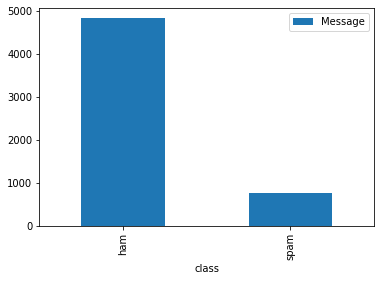

In [24]:
df.plot(kind='bar')

In [32]:
df1 = data.replace({'spam' : 1, 'ham': 0})

In [33]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [34]:
df1

,class,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [35]:
df1['Message']= df1.Message.str.lower()

In [36]:
df1.dropna(inplace=True)

In [37]:
features = tfidf.fit_transform(df1.Message).toarray()

In [38]:
features.shape

(5571, 2243)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df1['Message'], df1['class'], random_state = 0)

In [45]:
count_vect = CountVectorizer()

In [46]:
X_train_counts = count_vect.fit_transform(X_train)

In [47]:
X_train_counts

<4178x7426 sparse matrix of type '<class 'numpy.int64'>'
	with 55330 stored elements in Compressed Sparse Row format>

In [48]:
tfidf_transformer = TfidfTransformer()

In [49]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [50]:
clf = MultinomialNB()

In [51]:
clf.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [52]:
x = clf.predict(count_vect.transform(X_test))

In [53]:
len(x)

1393

In [54]:
sum(x == y_test)

1356

In [56]:
sum(0 == y_test)

1208

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [58]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [59]:
def model_score(model, X_trn, y_trn, X_tst):
    accuracies = cross_val_score(model, X_trn, y_trn, scoring='accuracy', cv=5)
    model.fit(X_trn, y_trn)
    pred = (model.predict(X_tst))
    return np.mean(accuracies), pred

In [60]:
print('model_name \t \tCV score \t \t F1 Score')
for model in models:
    score, y_pred=model_score(model,X_train_tfidf, y_train, count_vect.transform(X_test))
    f1 = f1_score(y_test, y_pred)
    print(model.__class__.__name__, '\t \t', score, '\t \t', f1)

model_name 	 	CV score 	 	 F1 Score


D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomForestClassifier 	 	 0.8654862705177356 	 	 0.0
LinearSVC 	 	 0.9772583909028507 	 	 0.8498845265588916
MultinomialNB 	 	 0.9516516910443489 	 	 0.888888888888889
LogisticRegression 	 	 0.9540446112970334 	 	 0.8


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
final_model = MultinomialNB()

In [70]:
final_model.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [71]:
predictions= final_model.predict(count_vect.transform(X_test))

In [72]:
sum(y_test == predictions) / len(y_test)

0.9734386216798278